# Breast Cancer Detection with CNN and Enhanced Visualization using GradCAM

### By Alen Sadique(20BAI1077) and Fathima Sona Sherin(20BAI1187)

In [1]:
# To make sure we are using gpu not cpu
import tensorflow as tf

device_name = tf.test.gpu_device_name()

if device_name is not None and device_name != '/device:GPU:0':
    print('GPU device found, but it may not be the default GPU.')
    print('Found GPU at: {}'.format(device_name))
else:
    print('No GPU device found. You may be running on a CPU-only environment.')



C:\Users\alens\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


GPU device found, but it may not be the default GPU.
Found GPU at: 


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten , Dropout , BatchNormalization, MaxPooling2D, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, ModelCheckpoint, CSVLogger

import tensorflow as tf

import pickle

from sklearn.metrics import classification_report,confusion_matrix

In [5]:
datagen = ImageDataGenerator(rescale = 1./255)

In [6]:

train = datagen.flow_from_directory('C:/Users/alens/Downloads/train', target_size=(224, 224), class_mode='binary', batch_size=64)
# load and iterate validation dataset
val = datagen.flow_from_directory('C:/Users/alens/Downloads/val/', target_size=(224, 224), class_mode='binary', batch_size=64)
# load and iterate test dataset
test = datagen.flow_from_directory('C:/Users/alens/Downloads/test/', target_size=(224, 224), class_mode='binary', batch_size=64)

Found 3816 images belonging to 2 classes.
Found 1908 images belonging to 2 classes.
Found 1908 images belonging to 2 classes.


In [7]:
imgs, labels = next(train)

In [8]:
imgs.shape

(64, 224, 224, 3)

In [9]:
train.class_indices


{'Benign': 0, 'Malignant': 1}

0.0


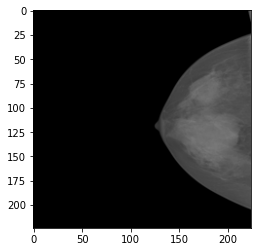

In [10]:
plt.imshow(imgs[0])
print(labels[0])

In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224,224,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
#https://blog.paperspace.com/intro-to-optimization-momentum-rmsprop-adam/

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [12]:
STEP_SIZE_TRAIN = train.n//train.batch_size
STEP_SIZE_VAL = val.n//val.batch_size

In [13]:
csv_logger = CSVLogger('C:/Users/alens/Downloads/training.log', separator=',', append=False)

In [14]:
history = model.fit_generator(generator = train, 
                    steps_per_epoch=STEP_SIZE_TRAIN, 
                    validation_data=test,
                    validation_steps=STEP_SIZE_VAL,
                    epochs=25,
                    callbacks=[csv_logger]) 
model.save('C:/Users/alens/Downloads/first_model.h5')

C:\Users\alens\AppData\Local\Temp/ipykernel_26340/3187497777.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator = train,


Epoch 1/25
59/59 [==============================] - 129s 2s/step - loss: 0.7490 - accuracy: 0.6604 - val_loss: 0.6326 - val_accuracy: 0.6708
Epoch 2/25
59/59 [==============================] - 127s 2s/step - loss: 0.6418 - accuracy: 0.6700 - val_loss: 0.6271 - val_accuracy: 0.6703
Epoch 3/25
59/59 [==============================] - 128s 2s/step - loss: 0.6402 - accuracy: 0.6692 - val_loss: 0.6220 - val_accuracy: 0.6703
Epoch 4/25
59/59 [==============================] - 127s 2s/step - loss: 0.6242 - accuracy: 0.6711 - val_loss: 0.6283 - val_accuracy: 0.6686
Epoch 5/25
59/59 [==============================] - 128s 2s/step - loss: 0.6080 - accuracy: 0.6679 - val_loss: 0.6039 - val_accuracy: 0.6659
Epoch 6/25
59/59 [==============================] - 129s 2s/step - loss: 0.5804 - accuracy: 0.6756 - val_loss: 0.5871 - val_accuracy: 0.6719
Epoch 7/25
59/59 [==============================] - 126s 2s/step - loss: 0.5525 - accuracy: 0.6994 - val_loss: 0.5918 - val_accuracy: 0.6843
Epoch 8/25
59

In [15]:
import pandas as pd
log_data = pd.read_csv('C:/Users/alens/Downloads/training.log', sep=',', engine='python')

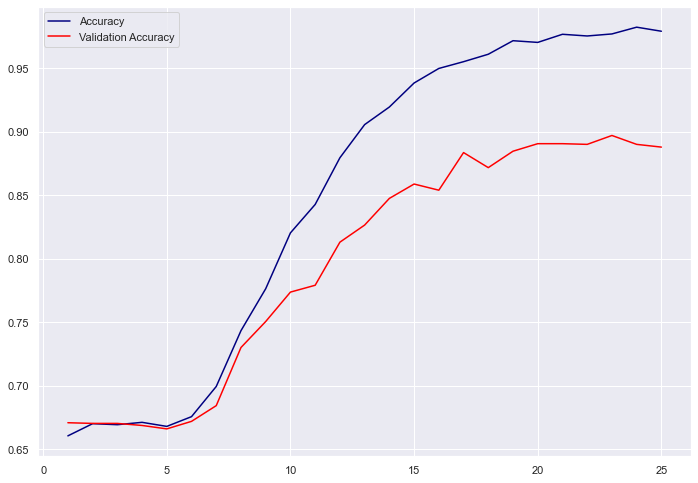

In [16]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.plot(np.arange(1, len(history.history['accuracy'])+1,1), history.history['accuracy'], color='navy', label = 'Accuracy')
plt.plot(np.arange(1, len(history.history['accuracy'])+1,1), history.history['val_accuracy'], color='red', label='Validation Accuracy')
plt.legend()

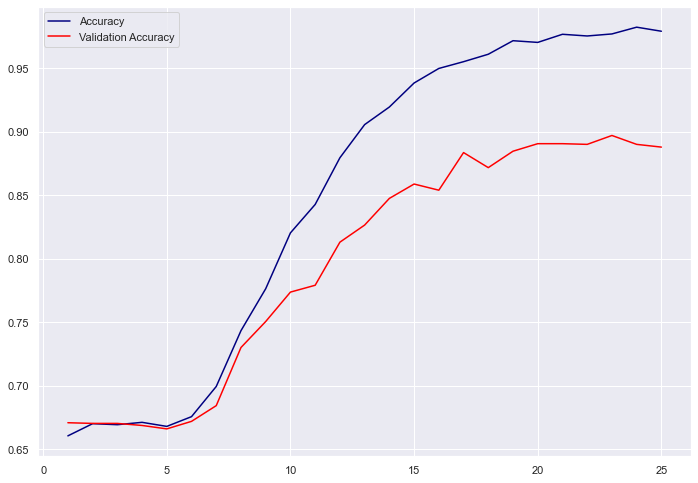

In [17]:
# show the accuracy graph from the saved history (log_data)
sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.plot(np.arange(1, len(log_data['accuracy'])+1,1), log_data['accuracy'], color='navy', label = 'Accuracy')
plt.plot(np.arange(1, len(log_data['accuracy'])+1,1), log_data['val_accuracy'], color='red', label='Validation Accuracy')
plt.legend()

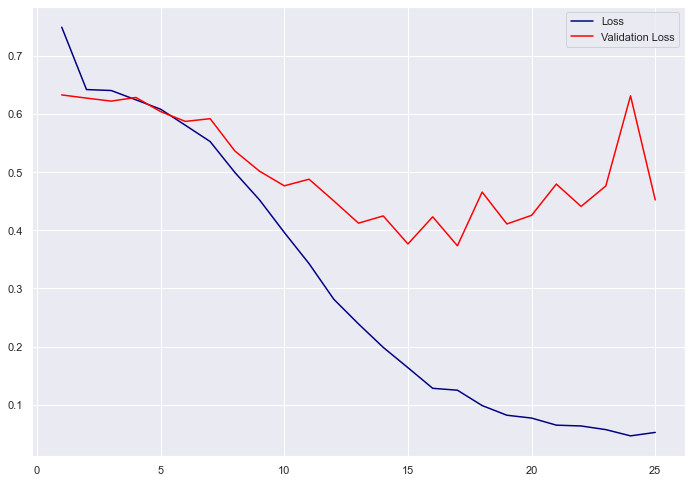

In [18]:
plt.plot(np.arange(1, len(history.history['loss'])+1,1), history.history['loss'], color='navy', label = 'Loss')
plt.plot(np.arange(1, len(history.history['loss'])+1,1), history.history['val_loss'], color='red', label='Validation Loss')
plt.legend()

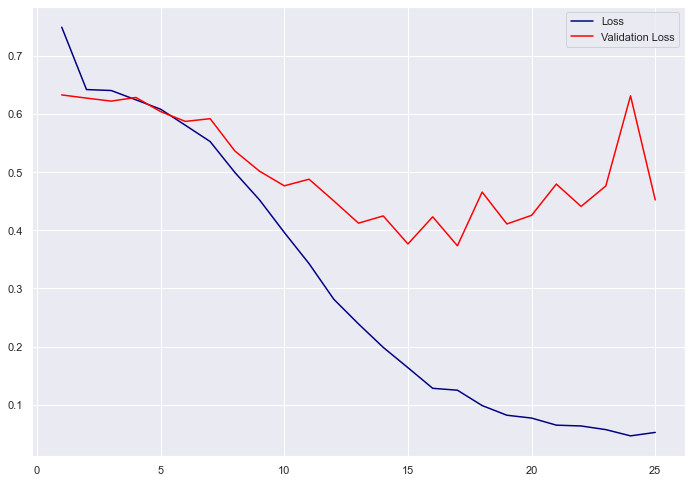

In [19]:
# show the loss graph from the saved history (log_data)

plt.plot(np.arange(1, len(log_data['loss'])+1,1), log_data['loss'], color='navy', label = 'Loss')
plt.plot(np.arange(1, len(log_data['loss'])+1,1), log_data['val_loss'], color='red', label='Validation Loss')
plt.legend()

In [11]:
from keras.models import load_model

restored_model = load_model('C:/Users/alens/Downloads/first_model.h5')

In [12]:
steps = test.n//test.batch_size

test.reset()
X_test, y_test = [] , []
for i in range(steps):
    a , b = test.next()
    X_test.extend(a) 
    y_test.extend(b)

In [22]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [23]:
pickle.dump(X_test, open('C:/Users/alens/Downloads/X_test.pkl', 'wb'))
pickle.dump(y_test, open('C:/Users/alens/Downloads/y_test.pkl', 'wb'))

In [13]:
X_test = pickle.load(open('C:/Users/alens/Downloads/X_test.pkl', 'rb'))
y_test = pickle.load(open('C:/Users/alens/Downloads/y_test.pkl', 'rb'))

In [14]:
print(X_test.shape, y_test.shape)

(1856, 224, 224, 3) (1856,)


In [16]:
# Using the saved model
score = restored_model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.43462908267974854 / Test accuracy: 0.8884698152542114


In [28]:
y_pred_prob = model.predict(X_test)

58/58 [==============================] - 13s 204ms/step


In [29]:
# Using the saved model
y_pred_prob = restored_model.predict(X_test)

58/58 [==============================] - 12s 200ms/step


In [30]:
y_pred_prob

array([[1.        ],
       [0.00568081],
       [0.9999898 ],
       ...,
       [0.9991068 ],
       [0.68816406],
       [0.06990463]], dtype=float32)

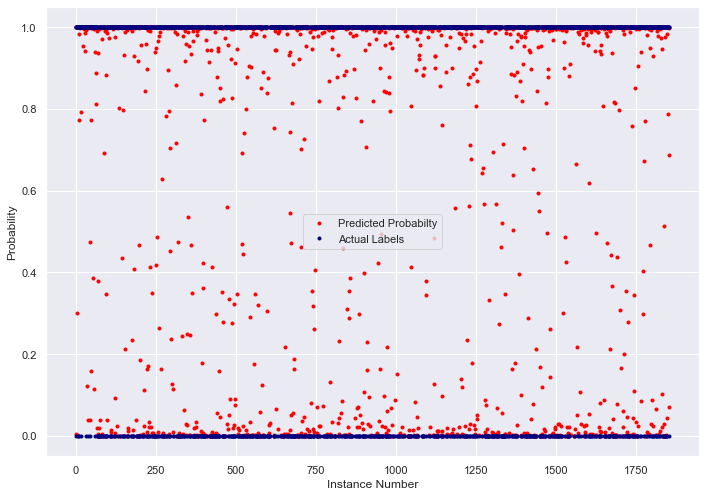

In [31]:
plt.plot(y_pred_prob,'.',color='red',label='Predicted Probabilty')
plt.plot(y_test,'.',color='navy',label='Actual Labels')
plt.xlabel('Instance Number')
plt.ylabel('Probability')
plt.legend()

In [32]:
y_test

array([1., 0., 1., ..., 1., 1., 0.], dtype=float32)

In [33]:
threshold = 0.5
y_pred = np.where(y_pred_prob > threshold, 1,0)
y_pred.squeeze()

array([1, 0, 1, ..., 1, 1, 0])

Text(0.5, 1.0, 'Confusion Metrix for Breast Cancer')

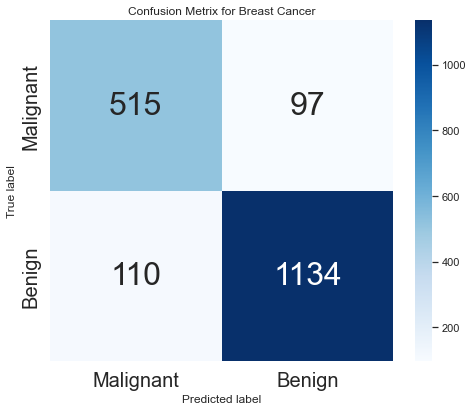

In [34]:
from sklearn.metrics import confusion_matrix

sns.set(rc={'figure.figsize':(7.7,6.27)})

sns.heatmap(confusion_matrix(y_test,y_pred),cmap=plt.cm.Blues,annot=True,annot_kws={"size": 32}, fmt='g')
plt.xticks([0.50,1.50], ['Malignant','Benign'], fontsize=20)
plt.yticks([0.50,1.50],['Malignant','Benign'], fontsize=20)

plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.title('Confusion Metrix for Breast Cancer')

In [35]:
print(classification_report(y_test, y_pred, target_names = ['Benign (Class 0)','Malignant (Class 1)']))

                     precision    recall  f1-score   support

   Benign (Class 0)       0.82      0.84      0.83       612
Malignant (Class 1)       0.92      0.91      0.92      1244

           accuracy                           0.89      1856
          macro avg       0.87      0.88      0.87      1856
       weighted avg       0.89      0.89      0.89      1856



In [36]:
from sklearn.metrics import roc_curve, auc

fpr , tpr , thresholds = roc_curve (y_test , y_pred_prob)

area_under_curve = auc(fpr, tpr)

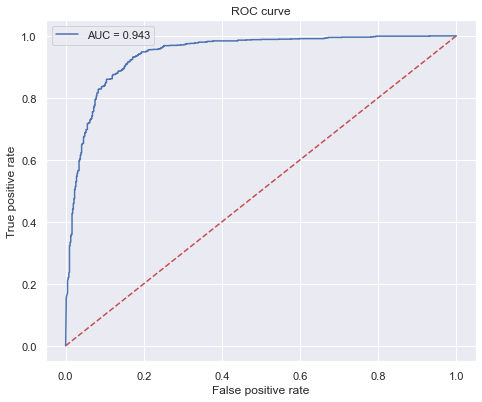

In [37]:
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(area_under_curve))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [38]:
cancer_labels = ['Benign','Malignant']

img_indices = np.random.randint(0, len(X_test), size=[25])
sample_test_images = X_test[img_indices]
sample_test_labels = [cancer_labels[i] for i in y_pred[img_indices].squeeze()]

max_prediction = np.argmax(y_pred_prob, axis=1)
prediction_probs = np.max(y_pred_prob, axis=1)

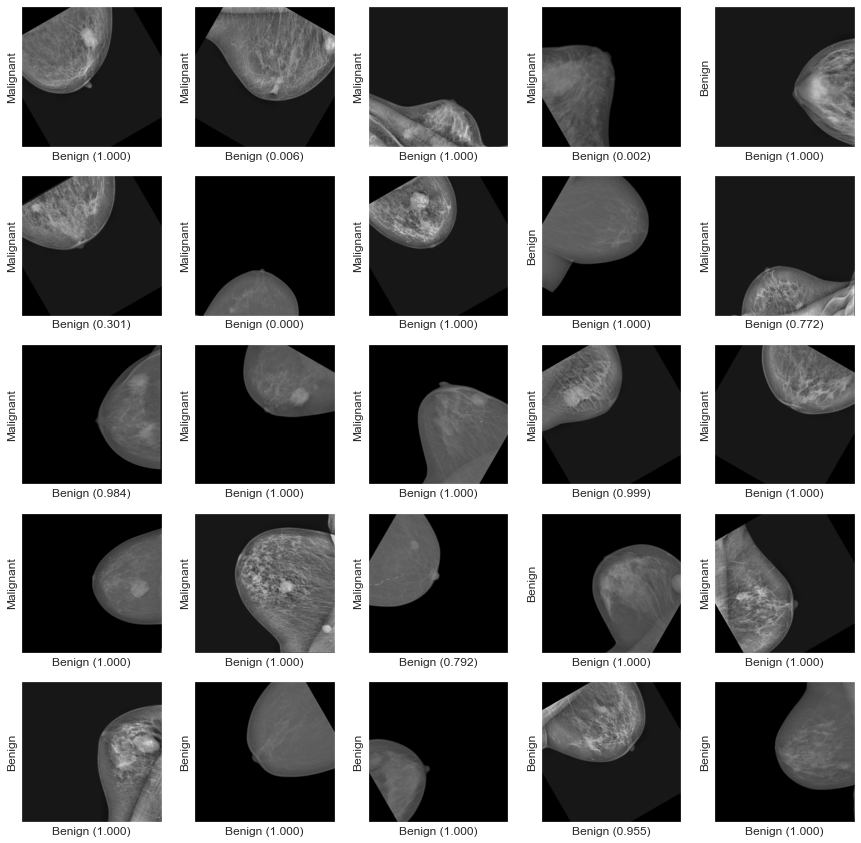

In [39]:
plt.figure(figsize=(15,15))
for i, (img, prediction, prob, true_label) in enumerate(
    zip(sample_test_images, max_prediction, prediction_probs, sample_test_labels)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')

  plt.imshow(img)
  plt.xlabel('{} ({:0.3f})'.format(cancer_labels[prediction], prob))
  plt.ylabel('{}'.format(true_label))


## User input 

In [1]:
from PIL import Image
import numpy as np
user_image_path = r"C:\Users\alens\Downloads\53582656 (24).png"
img = Image.open(user_image_path)
img = img.resize((224, 224))  # Resize to match the model's input size

# Convert the image to RGB format if it's grayscale
if img.mode != 'RGB':
    img = img.convert('RGB')

img = np.array(img)  # Convert to NumPy array
img = img / 255.0  # Normalize the image
og_image=img
#print(og_image.shape)
    # Add batch dimension to the image
img = np.expand_dims(img, axis=0)
# img.shape

In [2]:
from keras.models import load_model,Model
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

model=load_model(r"C:\Users\alens\Downloads\first_model.h5")
last_conv_layer=model.get_layer('conv2d_2')
# last_conv_layer_model=Model(inputs=model.inputs,outputs=last_conv_layer.output)
#For GradCAM
gradmodel = Model(inputs=model.inputs, outputs=[last_conv_layer.output,model.output])

sample_image=img

def get_idx(pred):
    threshold=0.5
    return 1 if pred>threshold else 0

result=get_idx(gradmodel.predict(sample_image)[1])

if result==1:
    print("classification result: Malignant")
else:
    print("classification result: Benign")


C:\Users\alens\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


1/1 [==============================] - 0s 203ms/step
classification result: Malignant


# GradCAM Visualisation

In [3]:
import tensorflow as tf
import numpy as np
import cv2


with tf.GradientTape() as tape:
    convout,preds = gradmodel(sample_image)
    idx=tf.argmax(preds[0])
    loss=preds[:,idx]
grads = tape.gradient(loss, convout)

pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
last_conv_layer_output=convout[0]


In [4]:
heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis] #This line calculates the dot product between the output of the last convolutional layer (last_conv_layer_output) and the spatially pooled gradients (pooled_grads). This operation essentially captures the importance of each channel in the convolutional layer concerning the final prediction.
heatmap = tf.squeeze(heatmap)
heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

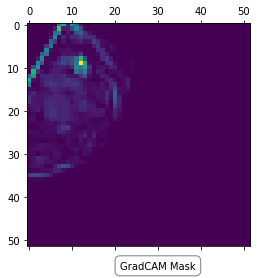

In [5]:
plt.matshow(heatmap.numpy())
plt.text(30, 56, 'GradCAM Mask', ha='center', va='center', bbox=dict(facecolor='white', edgecolor='grey', boxstyle='round,pad=0.5'))
plt.show()

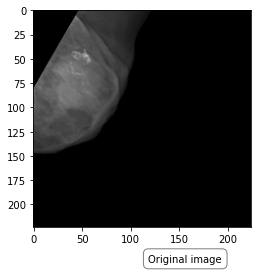

In [6]:
plt.imshow(og_image)
plt.text(156, 256, 'Original image', ha='center', va='center', bbox=dict(facecolor='white', edgecolor='grey', boxstyle='round,pad=0.5'))
plt.show()

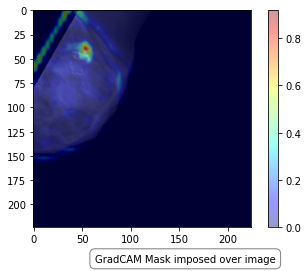

In [7]:
hm=cv2.resize(heatmap.numpy(),og_image.shape[:2])
plt.imshow(og_image)
plt.imshow(hm,alpha=0.4,cmap='jet')
plt.text(156, 256, 'GradCAM Mask imposed over image', ha='center', va='center', bbox=dict(facecolor='white', edgecolor='grey', boxstyle='round,pad=0.5'))
plt.colorbar()
plt.show()